# Notebook #6
Name: Nick Peters


## Problem Description:
Describe the problem you are going to attempt to solve
Describe the tools used and your approach. 

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# attempt to get GPU reserved
# In Google Colab, select Runtime -> Change runtime type
# If possible, select GPU and SAVE
# If not possible, OK. Computations may take a bit longer
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import keras
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
# import the libraries
import keras
import sys
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

<hr>

# Example code for Chest X-Ray

In [ ]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167 Datasets/chest_xray/train' #5216 images
test_data_dir = '/content/drive/MyDrive/CS167 Datasets/chest_xray/test'   #624 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


In [ ]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


##Normal CNN

In [58]:
# Set up CNN here
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2,2), input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2,2), input_shape=(img_width, img_height, 3)))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid')) #sigmoid because 2 classes (pneumonia or not pneumonia)

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [59]:
#train
training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=100, 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/100
163/163 [==============================] - 15s 89ms/step - loss: 0.4511 - accuracy: 0.8077 - val_loss: 0.3803 - val_accuracy: 0.8125
Epoch 2/100
163/163 [==============================] - 14s 87ms/step - loss: 0.2276 - accuracy: 0.9076 - val_loss: 0.5170 - val_accuracy: 0.7708
Epoch 3/100
163/163 [==============================] - 14s 88ms/step - loss: 0.1655 - accuracy: 0.9352 - val_loss: 0.8518 - val_accuracy: 0.7196
Epoch 4/100
163/163 [==============================] - 15s 89ms/step - loss: 0.1420 - accuracy: 0.9469 - val_loss: 1.0109 - val_accuracy: 0.7067
Epoch 5/100
163/163 [==============================] - 14s 87ms/step - loss: 0.1271 - accuracy: 0.9528 - val_loss: 0.5117 - val_accuracy: 0.8061
Epoch 6/100
163/163 [==============================] - 14s 88ms/step - loss: 0.1234 - accuracy: 0.9532 - val_loss: 0.7993 - val_accuracy: 0.7420
Epoch 7/100
163/163 [==============================] - 14s 87ms/step - loss: 0.1139 - accuracy: 0.9549 - val_loss: 1.0854 - val_ac

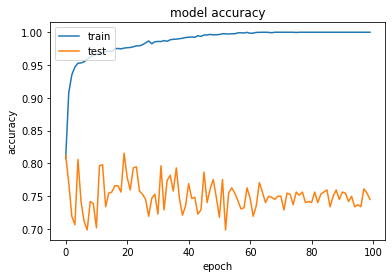

In [60]:
#visualization
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuned CNN

In [52]:
from keras.layers import Dropout

#setting up tuned CNN
tuned_model = Sequential()
tuned_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
tuned_model.add(MaxPooling2D(pool_size=(2,2), input_shape=(img_width, img_height, 3)))
tuned_model.add(Dropout(.2, (32,)))

tuned_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
tuned_model.add(MaxPooling2D(pool_size=(2,2), input_shape=(img_width, img_height, 3)))
tuned_model.add(Dropout(.2, (32,)))

tuned_model.add(Conv2D(64, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3)))
tuned_model.add(MaxPooling2D(pool_size=(4,4), input_shape=(img_width, img_height, 3)))
tuned_model.add(Dropout(.2, (64,)))

tuned_model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
tuned_model.add(Dense(64)) #fully-connected layer
tuned_model.add(Dense(1,activation='sigmoid')) #sigmoid because 2 classes (pneumonia or not pneumonia)

tuned_model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy']) 

In [53]:
#train
training_results2 = tuned_model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=50, 
        validation_data = test_data, 
        validation_steps = len(test_data)
        )

Epoch 1/50
163/163 [==============================] - 19s 110ms/step - loss: 0.5674 - accuracy: 0.7395 - val_loss: 0.5498 - val_accuracy: 0.8413
Epoch 2/50
163/163 [==============================] - 15s 91ms/step - loss: 0.4701 - accuracy: 0.7926 - val_loss: 0.7733 - val_accuracy: 0.6298
Epoch 3/50
163/163 [==============================] - 15s 90ms/step - loss: 0.3310 - accuracy: 0.8652 - val_loss: 0.5660 - val_accuracy: 0.7276
Epoch 4/50
163/163 [==============================] - 15s 89ms/step - loss: 0.2204 - accuracy: 0.9204 - val_loss: 0.5578 - val_accuracy: 0.7853
Epoch 5/50
163/163 [==============================] - 15s 89ms/step - loss: 0.1812 - accuracy: 0.9354 - val_loss: 0.4672 - val_accuracy: 0.8093
Epoch 6/50
163/163 [==============================] - 17s 103ms/step - loss: 0.1669 - accuracy: 0.9383 - val_loss: 0.7644 - val_accuracy: 0.7436
Epoch 7/50
163/163 [==============================] - 15s 89ms/step - loss: 0.1313 - accuracy: 0.9511 - val_loss: 0.5287 - val_accurac

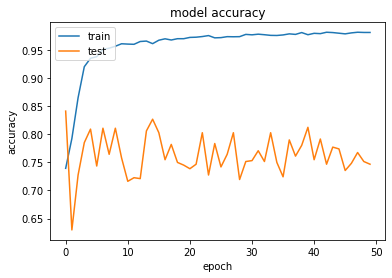

In [54]:
#visualization
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Conclusions

Based on the graphs, it appears as though the tuned model was able to achieve a slightly better result than the normal model. It is tough to say what exactly made the tuned model better since there were several high profile changes I made. My best guess is that it has something to do with the addition of dropout layers combined with adding another set of convolutional, pooling, and droupout layers. From the graph of the tuned model, I believe that the learning rate could use some adjusting since it never fully evened out. The big steps that the learning rate was making meant that it would have to readjust. I am not entirely sure how one would go about doing that. I would need to do further research in the API to fully learn how to change learning rates. Due to the way I ran the normal CNN for twice as long, it is the best example of overfitting. 100 epochs was way too many. Much of the algorithm's best performance can be found when it is trained on <= 50 epochs.